In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
invasive_data_2021 = pd.read_excel('/content/drive/MyDrive/CS430/Olmsted Project/olmstead_dataset.xlsx', sheet_name='2021 Cherokee Invasive Survey', skiprows=1)

In [30]:
invasive_data_2021.head()

,Trimble\nStation,N,E,S,W,Calculated using formula in densiometer,Calculated using formula in densiometer.1,Canopy,Understory,Lonicera japonica,...,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,Canopy gap and/or downed trees present
0,1,37,5,23,90.0,40.30,59.70,"Cherry, sassafrass, maple, hackberry, walnutash","Box elder, sugar maple saplings",2,...,0,3,0,0,0,1,3,0,0,1.0
1,2,8,4,3,5.0,5.20,94.80,"Cherry, black locust, ash, sugar maple, tulip ...","Sugar maple, ash, redbud, box elder,",1,...,0,4,0,0,0,2,1,0,0,0.0
2,3,10,6,13,17.0,11.96,88.04,"Tilia basswood, n red oak, maple, pin oak, hic...","Holly, maple saplings, ash saplings, buckeye",1,...,0,4,0,0,0,2,1,0,0,0.0
3,4,6,3,8,3.0,5.20,94.80,"Elm, cottonwood, walnut, sycamore, ironwood","Box elder, redbud, ash saplings",1,...,0,3,0,0,0,3,3,0,0,0.0
4,5,25,23,30,22.0,26.00,74.00,Basswood locust red oak ash?,Buckeye Spicebush ash sapling,3,...,1,3,0,0,1,1,3,0,0,0.0


In [38]:
invasive_data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Trimble
Station              164 non-null    int64   
 1   average_canopy_cover         164 non-null    float64 
 2   Lonicera japonica            164 non-null    int64   
 3   Microstegium vimineum        164 non-null    int64   
 4   Euonymus alatus              164 non-null    int64   
 5   Ampelopsis brevipedunculata  164 non-null    int64   
 6   Morus alba                   164 non-null    int64   
 7   Celastrus orbiculatus        164 non-null    int64   
 8   Vinca minor                  164 non-null    int64   
 9   Euonymus fortunei            164 non-null    int64   
 10  Akebia quinata               164 non-null    int64   
 11  Fallopia japonica            164 non-null    int64   
 12  Achyranthes                  164 non-null    int64   
 13  Heder

In [32]:
#dropping N, E, S, W, Canopy, Understory, and "Canopy gap and/or downed trees present" columns from data


In [33]:
invasive_data_2021.drop(['N', 'E', 'S', 'W', 'Calculated using formula in densiometer', 'Canopy', 'Understory', 'Canopy gap and/or downed trees present'], axis=1, inplace=True)

In [34]:
#renaming Calculated using formula in densiometer.1 to average_canopy_cover
invasive_data_2021.rename(columns={'Calculated using formula in densiometer.1': 'average_canopy_cover'}, inplace=True)

In [35]:
invasive_data_2021.head()

,Trimble\nStation,average_canopy_cover,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus
0,1,59.70,2,1,0,3,1,2,0,3,0,0,0,1,3,0,0
1,2,94.80,1,0,0,0,0,0,0,4,0,0,0,2,1,0,0
2,3,88.04,1,0,0,0,0,0,0,4,0,0,0,2,1,0,0
3,4,94.80,1,0,0,3,0,0,0,3,0,0,0,3,3,0,0
4,5,74.00,3,0,0,3,0,0,1,3,0,0,1,1,3,0,0


In [47]:
# creating a column invasive_sum where each from is the sum from columns 2-16\
invasive_data_2021['invasive_sum'] = invasive_data_2021.iloc[:, 2:17].sum(axis=1)
invasive_data_2021.head()

,Trimble\nStation,average_canopy_cover,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,canopy_coverage,invasive_sum
0,1,59.70,2,1,0,3,1,2,0,3,0,0,0,1,3,0,0,moderate,16
1,2,94.80,1,0,0,0,0,0,0,4,0,0,0,2,1,0,0,most,8
2,3,88.04,1,0,0,0,0,0,0,4,0,0,0,2,1,0,0,most,8
3,4,94.80,1,0,0,3,0,0,0,3,0,0,0,3,3,0,0,most,13
4,5,74.00,3,0,0,3,0,0,1,3,0,0,1,1,3,0,0,more,15


In [36]:
# creating a column 'canopy_coverage' and assigning rows values of 'minimal', 'less', 'moderate', 'more', 'most' based on average_canopy_coverage
# 0-20 -> minimal, 21-40 -> less, 41-60 -> moderate, 61-80 -> more, 81-100 -> most
invasive_data_2021['canopy_coverage'] = pd.cut(invasive_data_2021['average_canopy_cover'], bins=[0, 20, 40, 60, 80, 100], labels=['minimal', 'less', 'moderate', 'more', 'most'])
invasive_data_2021.head()

,Trimble\nStation,average_canopy_cover,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,canopy_coverage
0,1,59.70,2,1,0,3,1,2,0,3,0,0,0,1,3,0,0,moderate
1,2,94.80,1,0,0,0,0,0,0,4,0,0,0,2,1,0,0,most
2,3,88.04,1,0,0,0,0,0,0,4,0,0,0,2,1,0,0,most
3,4,94.80,1,0,0,3,0,0,0,3,0,0,0,3,3,0,0,most
4,5,74.00,3,0,0,3,0,0,1,3,0,0,1,1,3,0,0,more


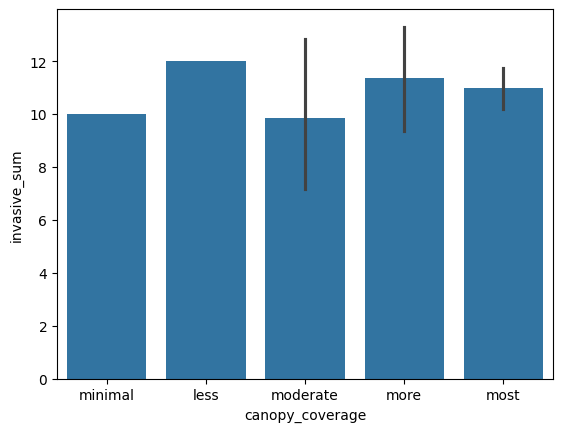

In [48]:
# creating a bar chart that has canopy_coverage as the x-value and sum of columns 2-16 in the y
sns.barplot(x='canopy_coverage', y='invasive_sum', data=invasive_data_2021)
plt.show()